In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
%pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
if 'seaborn-v0_8' in plt.style.available:
    plt.style.use('seaborn-v0_8')
else:
    print("seaborn-v0_8 스타일은 사용할 수 없습니다.")

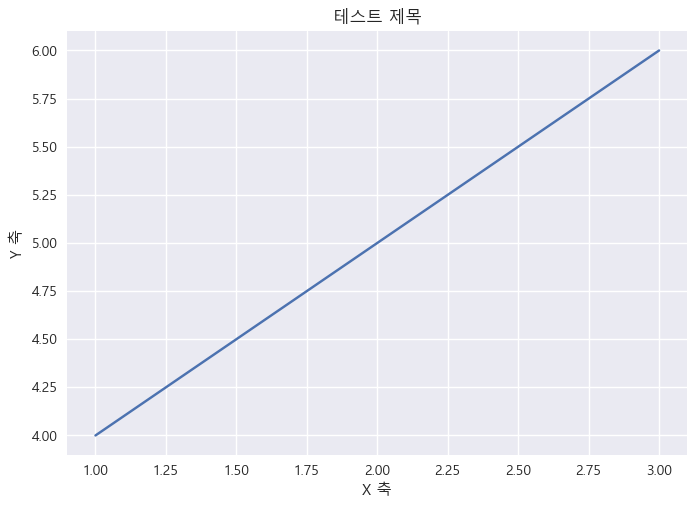

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.style.use('seaborn-v0_8') #matplotlib의 한글폰트 설정이 날아감
# 한글 폰트 경로 설정 (예: 'Malgun Gothic' 폰트)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib에서 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 예시 그래프
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('테스트 제목')  # 한글 제목
plt.xlabel('X 축')       # 한글 X축 레이블
plt.ylabel('Y 축')       # 한글 Y축 레이블
plt.show()


In [6]:
%pwd

'd:\\Python\\Practice\\ch16'

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


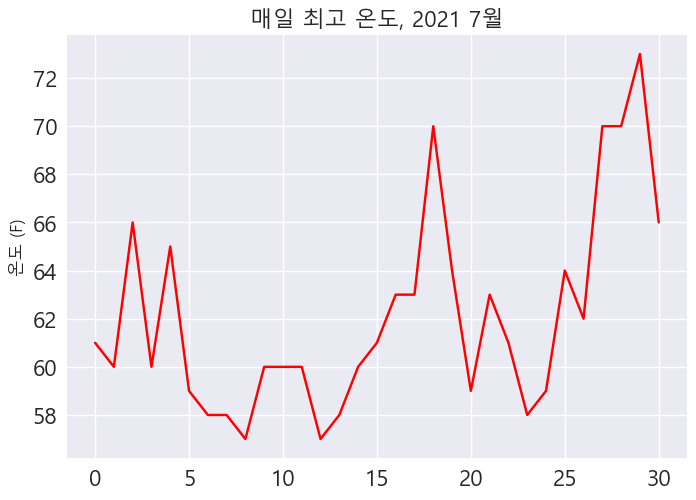

In [19]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import csv

import matplotlib.pyplot as plt
# Plot the high temperatures.
plt.style.use('seaborn-v0_8')
# plt.style.use('seaborn')
### seaborn 스타일을 사용하면 matplotlib의 설정이 변경되면서 한글 폰트 설정이 초기화되거나, 시스템의 기본 폰트가 한글을 지원하지 않는 경우에도 발생

# 사용할 한글 폰트를 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib에서 폰트 설정
plt.rc('font', family=font_prop.get_name())

path = Path('../../TestFile/chapter_16/the_csv_file_format/partial_programs/weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines() #전체 파일을 읽어서 라인들의 리스트로 가져옴

reader = csv.reader(lines) #콤마로 구분?
header_row = next(reader)

for index, column_header in enumerate(header_row):
    print(index, column_header)


# Extract high temperatures.
highs = []
for row in reader: # 교재 452, for loop가 파일의 한줄씩 자동으로 읽는다 > 이해하는 것이 필요
    high = int(row[4]) # 인덱스 4이므로 TMAX를 가져온다
    highs.append(high)


fig, ax = plt.subplots()
ax.plot(highs, color='red') # 그래프 그리기 

# Format plot.
ax.set_title("매일 최고 온도, 2021 7월", fontsize=16)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("온도 (F)", fontsize=12)
ax.tick_params(labelsize=16)

plt.show()

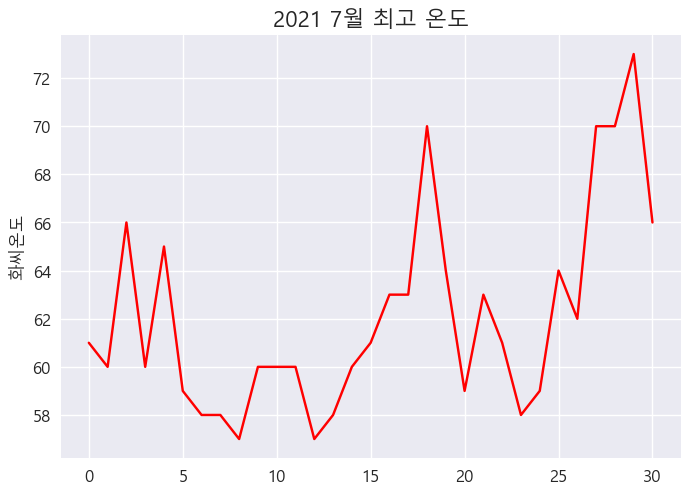

In [11]:
# 파일 읽는 클래스 구현하기

from pathlib import Path
import csv
import matplotlib.pyplot as plt

class WeatherData:
    def __init__(self, file_path):
        self.path = Path(file_path)
        self.highs = []

    def read_data(self):
        """CSV 파일에서 데이터를 읽어 최고 온도를 리스트에 저장합니다."""
        lines = self.path.read_text().splitlines()
        reader = csv.reader(lines)
        header_row = next(reader)  # 헤더 행 건너뛰기

        # 최고 온도 추출
        for row in reader:
            high = int(row[4])  # 5번째 열(인덱스 4)이 최고 온도라고 가정
            self.highs.append(high)

    def plot_high_temperatures(self):
        """저장된 최고 온도의 변화를 그래프로 시각화합니다."""
        fig, ax = plt.subplots()
        ax.plot(self.highs, color='red')

        # 그래프 형식 설정
        ax.set_title("2021 7월 최고 온도", fontsize=16)
        ax.set_xlabel('', fontsize=12)
        ax.set_ylabel("화씨온도", fontsize=12)
        ax.tick_params(labelsize=12)

        plt.show()


# 실행 부분
weather_data = WeatherData('../../TestFile/chapter_16/the_csv_file_format/partial_programs/weather_data/sitka_weather_07-2021_simple.csv')
weather_data.read_data()
weather_data.plot_high_temperatures()


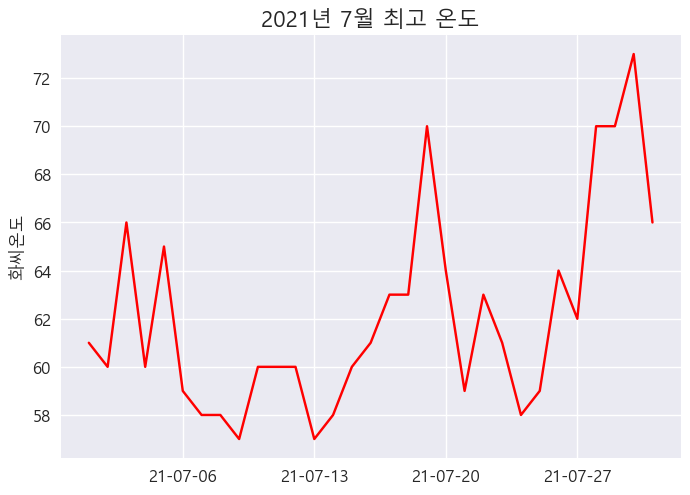

In [6]:
# 파일 읽는 클래스 구현하기 > 
## x축에 날짜로 바꾸기: 교재455 16.1.6 그래프에 날짜 추가하기

from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

class WeatherData:
    def __init__(self, file_path):
        self.path = Path(file_path)
        self.highs, self.dates = [],[]

    def read_data(self):
        """CSV 파일에서 데이터를 읽어 최고 온도를 리스트에 저장합니다."""
        lines = self.path.read_text().splitlines()
        reader = csv.reader(lines)
        header_row = next(reader)  # 헤더 행 건너뛰기

        # 최고 온도 추출
        for row in reader:
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            high = int(row[4])  # 5번째 열(인덱스 4)이 최고 온도라고 가정
            self.highs.append(high)
            self.dates.append(current_date)

    def plot_high_temperatures(self):
        """저장된 최고 온도의 변화를 그래프로 시각화합니다."""
        fig, ax = plt.subplots()
        ax.plot(self.dates,self.highs, color='red')

                 # 날짜 포맷 및 간격 설정
        ax.xaxis.set_major_locator(mdates.WeekdayLocator())  # 주 단위로 날짜 표시
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))  # 날짜 형식

        # 그래프 형식 설정
        ax.set_title("2021년 7월 최고 온도", fontsize=16)
        ax.set_xlabel('', fontsize=12)
        ax.set_ylabel("화씨온도", fontsize=12)
        ax.tick_params(labelsize=12)

        plt.show()


# 실행 부분
weather_data = WeatherData( '../../TestFile/chapter_16/the_csv_file_format/partial_programs/weather_data/sitka_weather_07-2021_simple.csv')
weather_data.read_data()
weather_data.plot_high_temperatures()


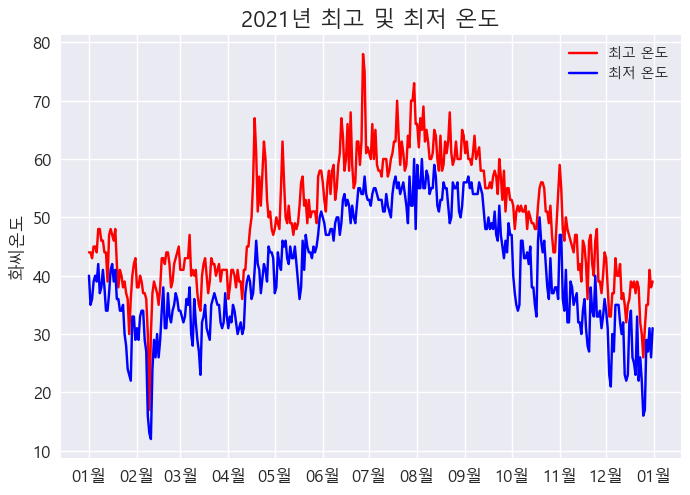

In [18]:
### 실습 구현 대상 - full version 파일에 대하여 구현
from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

class WeatherData:
    def __init__(self, file_path):
        self.path = Path(file_path)
        self.highs, self.lows, self.dates = [], [], []

    def read_data(self):
        """CSV 파일에서 데이터를 읽어 최고 및 최저 온도를 리스트에 저장합니다."""
        lines = self.path.read_text().splitlines()
        reader = csv.reader(lines)
        header_row = next(reader)

        # 온도 추출
        for row in reader:
            if row[7] == '' or row[8] =='': continue
            high = int(row[7])
            low = int(row[8])
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            self.highs.append(high)
            self.lows.append(low)
            self.dates.append(current_date)

    def plot_temperatures(self):
        """저장된 최고 및 최저 온도의 변화를 그래프로 시각화합니다."""
        fig, ax = plt.subplots()
        ax.plot(self.dates, self.highs, color='red', label='최고 온도')
        ax.plot(self.dates, self.lows, color='blue', label='최저 온도')

        # 날짜 포맷 및 간격 설정
        ax.xaxis.set_major_locator(mdates.MonthLocator())  # 주 단위로 날짜 표시
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m월'))  # 날짜 형식

        # 그래프 형식 설정
        ax.set_title("2021년 최고 및 최저 온도", fontsize=16)
        ax.set_xlabel('', fontsize=12)
        ax.set_ylabel("화씨온도", fontsize=12)
        ax.tick_params(labelsize=12)
        ax.legend()  # 범례 추가

        # fig.autofmt_xdate()  # 날짜가 겹치지 않도록 자동으로 기울여 출력
        plt.show()


# 실행 부분
weather_data = WeatherData('../../TestFile/chapter_16/the_csv_file_format/partial_programs/weather_data/sitka_weather_2021_full.csv')
weather_data.read_data()
weather_data.plot_temperatures()


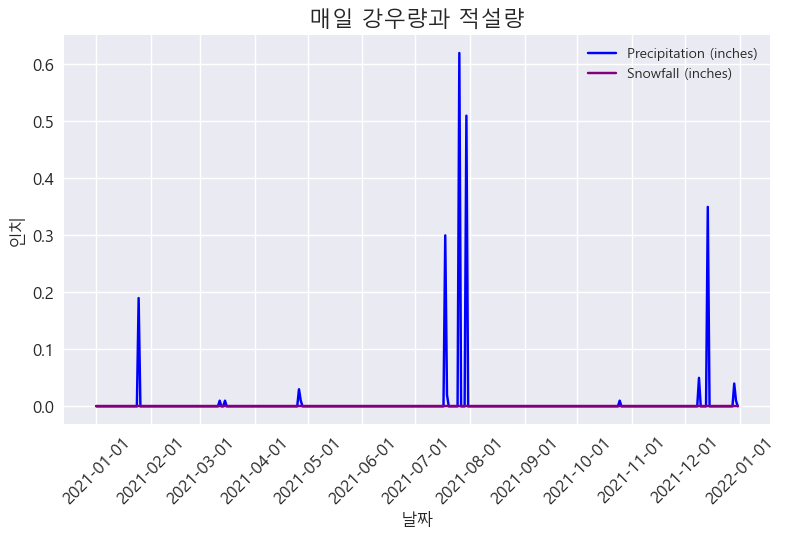

In [22]:
### death valley 파일에 대한 구현
# death_valley_2021-full 데이터 파일 처리 
from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

class WeatherData:
    def __init__(self, file_path):
        self.path = Path(file_path)
        self.dates, self.precipitation, self.snowfall = [], [], []

    def read_data(self):
        """CSV 파일에서 데이터를 읽어 날짜별 강수량과 적설량을 저장합니다."""
        lines = self.path.read_text().splitlines()
        reader = csv.reader(lines)
        header_row = next(reader)

        for row in reader:
            precipitation = float(row[3])
            snowfall = float(row[4])
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            self.precipitation.append(precipitation)
            self.snowfall.append(snowfall)
            self.dates.append(current_date)
    
    def plot_precipitation_and_snowfall(self):
        """날짜별 강수량과 적설량 변화를 시각화합니다."""
        fig, ax = plt.subplots()

        # 강수량(PRCP) 그래프
        ax.plot(self.dates, self.precipitation, color='blue', label='Precipitation (inches)')

        # 적설량(SNOW) 그래프 (y축 공유)
        ax.plot(self.dates, self.snowfall, color='purple', label='Snowfall (inches)')

        # 날짜 포맷 및 간격 설정
        ax.xaxis.set_major_locator(mdates.MonthLocator())  # 월 단위로 날짜 표시
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 날짜 형식

        # 그래프 형식 설정
        ax.set_title("매일 강우량과 적설량", fontsize=16)
        ax.set_xlabel('날짜', fontsize=12)
        ax.set_ylabel('인치', fontsize=12)
        ax.tick_params(labelsize=12)
        plt.xticks(rotation=45)

        # 범례 표시
        ax.legend()

        # 그래프 출력
        plt.tight_layout()
        plt.show()


# 실행 부분
weather_data = WeatherData('../../TestFile/chapter_16/the_csv_file_format/partial_programs/weather_data/death_valley_2021_full.csv')
weather_data.read_data()
weather_data.plot_precipitation_and_snowfall()


16.2 GeoJson

교재 466-468 페이지 : Geojson 데이터 구조 확인하기

In [23]:
%pwd

'd:\\Python\\Practice\\ch16'

In [26]:
from pathlib import Path
import json


# Read data as a string and convert to a Python object.
path = Path('../../TestFile/chapter_16/mapping_global_datasets/eq_data/eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

mags, lons, lats = [], [], [] #latitude 위도, longitude 경도
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)

print(mags[:10])
print(lons[:5])
print(lats[:5])


[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]
[-150.7585, -153.4716, -148.7531, -159.6267, -155.248336791992]
[61.7591, 59.3152, 63.1633, 54.5612, 18.7551670074463]


In [27]:
from pathlib import Path
import json

import plotly.express as px ### 터미널에서 pip install plotly 사용 > 교재 472 페이지 그림 16-7 


# Read data as a string and convert to a Python object.
path = Path('../../TestFile/chapter_16/mapping_global_datasets/eq_data/eq_data_30_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

mags, lons, lats, eq_titles = [], [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    eq_title = eq_dict['properties']['title']
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)
    eq_titles.append(eq_title)

title = '전세계 지진도'
fig = px.scatter_geo(lat=lats, lon=lons, size=mags, title=title,
        color=mags,
        color_continuous_scale='Viridis',
        labels={'color':'지진강도'},
        projection='natural earth',
        hover_name=eq_titles, #hover text
    )
fig.show()

In [28]:
from pathlib import Path
import json
import plotly.express as px

# Read data as a string and convert to a Python object.
path = Path('../../TestFile/chapter_16/mapping_global_datasets/eq_data/eq_data_30_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

# Prepare lists to hold earthquake data
mags, lons, lats, eq_titles = [], [], [], []

# Define Japan's latitude and longitude bounds
lat_min, lat_max = 24.396308, 45.551483  # Japan's latitude bounds
lon_min, lon_max = 122.93457, 153.986672  # Japan's longitude bounds

# Filter for earthquakes that occur in Japan
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    eq_title = eq_dict['properties']['title']
    
    # Check if the earthquake is within Japan's bounds
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        mags.append(mag)
        lons.append(lon)
        lats.append(lat)
        eq_titles.append(eq_title)

# Plot only the earthquakes that are in Japan
title = '일본 지진도'
fig = px.scatter_geo(lat=lats, lon=lons, size=mags, title=title,
                     color=mags,
                     color_continuous_scale='Viridis',
                     labels={'color': '지진세기'},
                     #projection='natural earth',
                     projection='mercator',  # Set projection to mercator for better focus on Japan
                     hover_name=eq_titles,
                     scope = 'asia'
                     )
# Set the map bounds to focus on Japan
fig.update_geos(
    lonaxis=dict(range=[122, 154]),  # Longitude range for Japan
    lataxis=dict(range=[24, 46])      # Latitude range for Japan
)

fig.show()


미국 지질 조사국 - 지진 데이터
https://earthquake.usgs.gov/earthquakes/feed

In [3]:
#파일 말고 api로 읽기

import requests
import json
from pathlib import Path

def download_usgs_earthquake_summary(output_file):
    # USGS 지진 데이터 세트의 요약 API URL
    url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"
    
    # API 요청
    response = requests.get(url)
    print(f'Status code : {response.status_code}')
    
    # 응답 확인
    if response.status_code == 200:
        # JSON 데이터 저장
        with open(output_file, 'w', encoding='utf-8') as f:
            json.dump(response.json(), f, ensure_ascii=False, indent=4)
        print(f"Data downloaded and saved to {output_file}")
    else:
        print(f"Failed to retrieve data: {response.status_code}")

# 출력 파일 경로
output_file_path = Path("./eq_data/usgs_earthquake_summary.geojson")

# 함수 호출
download_usgs_earthquake_summary(output_file_path)


Status code : 200
Data downloaded and saved to eq_data\usgs_earthquake_summary.geojson


In [13]:
###미국 지질 조사국 최근 데이터 사용 
from pathlib import Path
import json

import plotly.express as px ### 터미널에서 pip install plotly 사용 > 교재 472 페이지 그림 16-7 


# Read data as a string and convert to a Python object.
path = Path('./eq_data/usgs_earthquake_summary.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

mags, lons, lats, eq_titles = [], [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    eq_title = eq_dict['properties']['title']
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)
    eq_titles.append(eq_title)
    mag_size = [abs(v) for v in mags]


title = '전세계 지진도'
fig = px.scatter_geo(lat=lats, lon=lons, size=mag_size, title=title,
        color=mags,
        color_continuous_scale='Viridis',
        labels={'color':'지진강도'},
        projection='natural earth',
        hover_name=eq_titles, #hover text
    )
fig.show()


In [4]:
import requests
import json
from pathlib import Path

def download_korea_earthquake_data(output_file):
    # USGS 지진 데이터 API URL
    url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
    
    # 쿼리 파라미터 설정
    params = {
        'format': 'geojson',
        'starttime': '2013-01-01',  # 시작 날짜
        'endtime': '2023-12-31',    # 종료 날짜
        'minlatitude': 33.0,         # 한반도 최소 위도
        'maxlatitude': 43.0,         # 한반도 최대 위도
        'minlongitude': 124.0,       # 한반도 최소 경도
        'maxlongitude': 132.0,       # 한반도 최대 경도
        'orderby': 'time'            # 시간 순으로 정렬
    }

    # API 요청
    response = requests.get(url, params=params)

    # 응답 확인
    if response.status_code == 200:
        # JSON 데이터 저장
        with open(output_file, 'w', encoding='utf-8') as f:
            json.dump(response.json(), f, ensure_ascii=False, indent=4)
        print(f"Korea earthquake data downloaded and saved to {output_file}")
    else:
        print(f"Failed to retrieve data: {response.status_code}")

# 출력 파일 경로
output_file_path = Path("./eq_data/korea_earthquake_data.geojson")

# 함수 호출
download_korea_earthquake_data(output_file_path)


Korea earthquake data downloaded and saved to eq_data\korea_earthquake_data.geojson


In [3]:
from pathlib import Path
import json
import plotly.express as px

# Read data as a string and convert to a Python object.
path = Path('./eq_data/korea_earthquake_data.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

mags, lons, lats, eq_titles = [], [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    eq_title = eq_dict['properties']['title']
    
    # 한반도 내의 지진만 추가 (위도: 33°~43°, 경도: 124°~132°)
    if 33.0 <= lat <= 43.0 and 124.0 <= lon <= 132.0:
        mags.append(mag)
        lons.append(lon)
        lats.append(lat)
        eq_titles.append(eq_title)

title = '한반도 지진도'
fig = px.scatter_geo(
    lat=lats,
    lon=lons,
    size=mags,
    title=title,
    color=mags,
    color_continuous_scale='Viridis',
    labels={'color': '지진강도'},
    projection='natural earth',
    hover_name=eq_titles,  # hover text
)

fig.update_geos(
    lonaxis=dict(range=[124, 132]),  # Longitude range for Japan
    lataxis=dict(range=[33, 43])      # Latitude range for Japan
)

fig.show()
